In [34]:
import numpy as np
import scipy.stats as stats
import seaborn as sns

import matplotlib.pyplot as plt
import pandas as pd

# Preprocessing

In [64]:
df_data_2020 = pd.read_csv("../dane/2020VAERSDATA.csv", encoding='latin1', low_memory=False)
df_vax_2020 = pd.read_csv("../dane/2020VAERSVAX.csv", encoding='latin1', low_memory=False)
df_2020 = pd.merge(df_data_2020, df_vax_2020, on='VAERS_ID')

df_data_2021 = pd.read_csv("../dane/2021VAERSDATA.csv", encoding='latin1', low_memory=False)
df_vax_2021 = pd.read_csv("../dane/2021VAERSVAX.csv", encoding='latin1', low_memory=False)
df_2021 = pd.merge(df_data_2021, df_vax_2021, on='VAERS_ID')

df_article = pd.concat([df_2020, df_2021])

In [36]:
df = df.set_index('VAERS_ID')

In [65]:
df['RECVDATE'] = pd.to_datetime(df['RECVDATE'], format='%m/%d/%Y')

start_date = '2020-12-14'
end_date = '2021-01-22'

df = df[(df['RECVDATE'] >= start_date) & (df['RECVDATE'] <= end_date)]

In [66]:
df = df[["STATE", "CAGE_YR", "SEX", "DIED", "HOSPITAL", "HOSPDAYS", "NUMDAYS", "VAX_TYPE", "VAX_MANU"]]

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64921 entries, 46099 to 51342
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   STATE     52156 non-null  object 
 1   CAGE_YR   56362 non-null  float64
 2   SEX       64921 non-null  object 
 3   DIED      349 non-null    object 
 4   HOSPITAL  1044 non-null   object 
 5   HOSPDAYS  653 non-null    float64
 6   NUMDAYS   60416 non-null  float64
 7   VAX_TYPE  64921 non-null  object 
 8   VAX_MANU  64921 non-null  object 
dtypes: float64(3), object(6)
memory usage: 5.0+ MB


In [69]:
df = df[df["SEX"].isin(["F", "M"])]
df['SEX'] = df['SEX'].apply(lambda x: 1 if x == 'F' else 0)
df = df.dropna(subset=["STATE", "CAGE_YR", "NUMDAYS"])
df['DIED'] = df['DIED'].apply(lambda x: 1 if x == 'Y' else 0)
df['HOSPITAL'] = df['HOSPITAL'].apply(lambda x: 1 if x == 'Y' else 0)
df['HOSPDAYS'] = pd.to_numeric(df['HOSPDAYS'], errors='coerce').fillna(0)

df = df[df["NUMDAYS"] <= 90]

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45649 entries, 46099 to 51282
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   STATE     45649 non-null  object 
 1   CAGE_YR   45649 non-null  float64
 2   SEX       45649 non-null  int64  
 3   DIED      45649 non-null  int64  
 4   HOSPITAL  45649 non-null  int64  
 5   HOSPDAYS  45649 non-null  float64
 6   NUMDAYS   45649 non-null  float64
 7   VAX_TYPE  45649 non-null  object 
 8   VAX_MANU  45649 non-null  object 
dtypes: float64(3), int64(3), object(3)
memory usage: 3.5+ MB


In [70]:
df = df[df["VAX_TYPE"] == 'COVID19']

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42021 entries, 46527 to 51282
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   STATE     42021 non-null  object 
 1   CAGE_YR   42021 non-null  float64
 2   SEX       42021 non-null  int64  
 3   DIED      42021 non-null  int64  
 4   HOSPITAL  42021 non-null  int64  
 5   HOSPDAYS  42021 non-null  float64
 6   NUMDAYS   42021 non-null  float64
 7   VAX_TYPE  42021 non-null  object 
 8   VAX_MANU  42021 non-null  object 
dtypes: float64(3), int64(3), object(3)
memory usage: 3.2+ MB


In [71]:
df.describe()

,CAGE_YR,SEX,DIED,HOSPITAL,HOSPDAYS,NUMDAYS
count,42021.000000,42021.000000,42021.000000,42021.000000,42021.000000,42021.000000
mean,45.611504,0.819757,0.005973,0.016516,0.030318,1.967921
std,15.458716,0.384394,0.077056,0.127449,0.358529,3.620355
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,44.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,56.000000,1.000000,0.000000,0.000000,0.000000,2.000000
max,104.000000,1.000000,1.000000,1.000000,15.000000,69.000000


# Analysis

<Axes: >

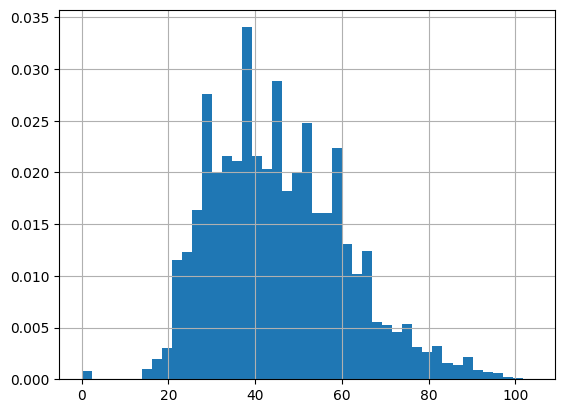

In [72]:
df["CAGE_YR"].hist(bins=45, density=True)

<Axes: >

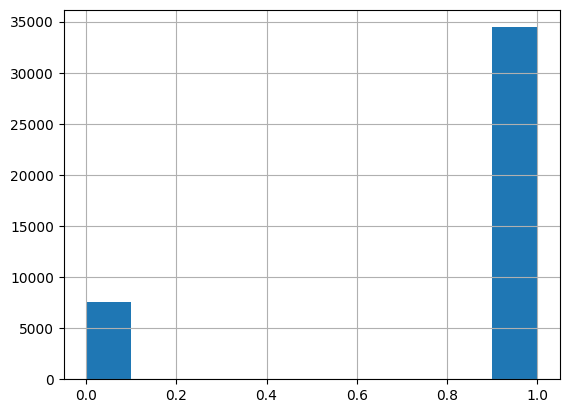

In [73]:
df["SEX"].hist()

<Axes: >

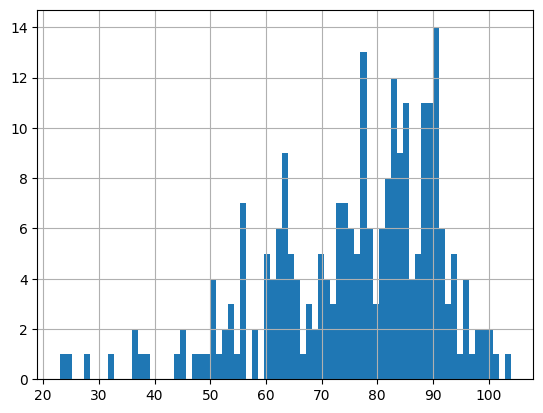

In [80]:
df[df["DIED"]==1]["CAGE_YR"].hist(bins=75)

<Axes: >

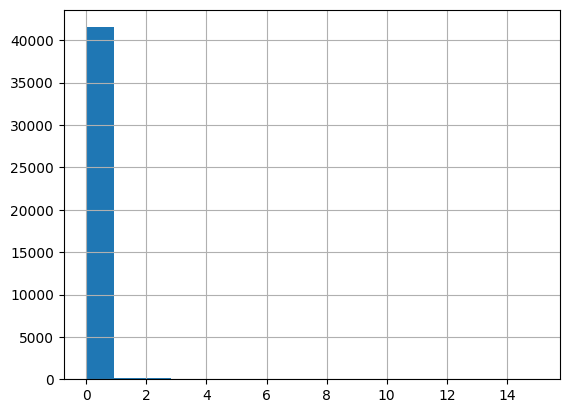

In [84]:
# print(df["HOSPDAYS"].value_counts())
df["HOSPDAYS"].hist(bins=16)

<Axes: >

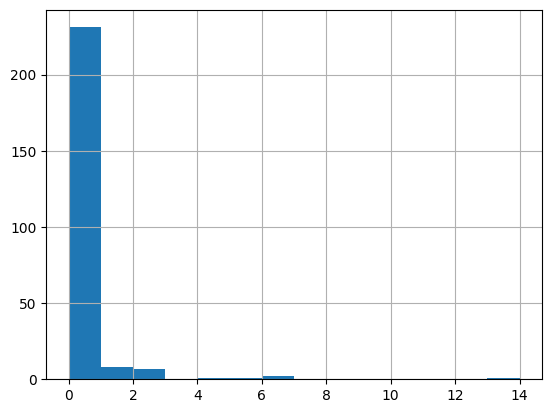

In [85]:
df[df["DIED"]==1]["HOSPDAYS"].hist(bins=14)

<Axes: >

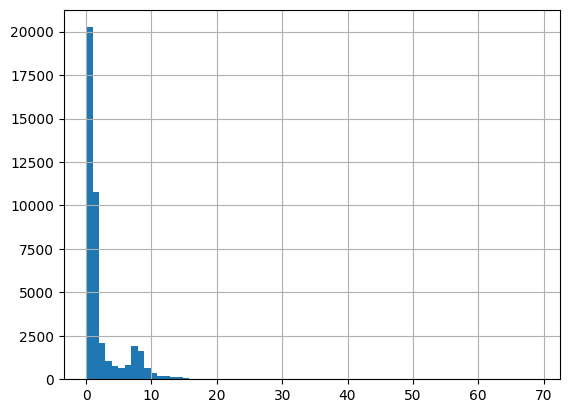

In [88]:
# print(df["NUMDAYS"].value_counts())
# print(df["NUMDAYS"].value_counts())
df["NUMDAYS"].hist(bins=70)

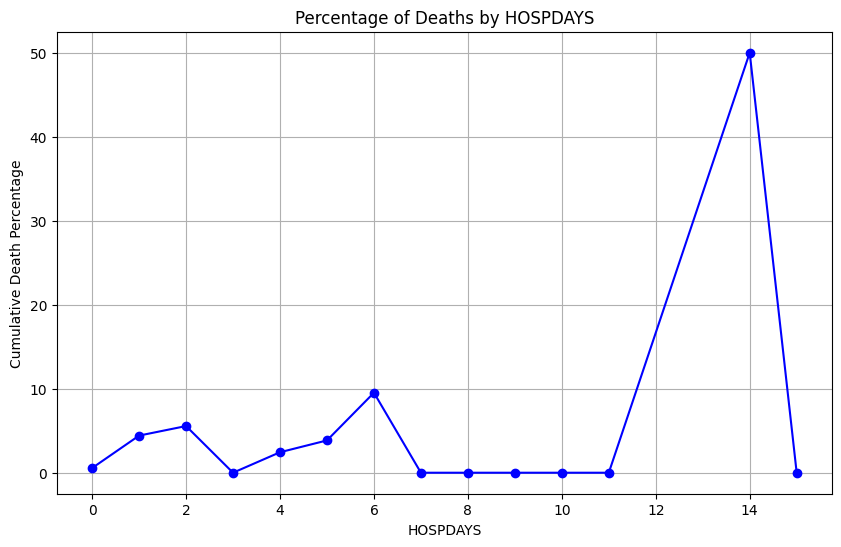

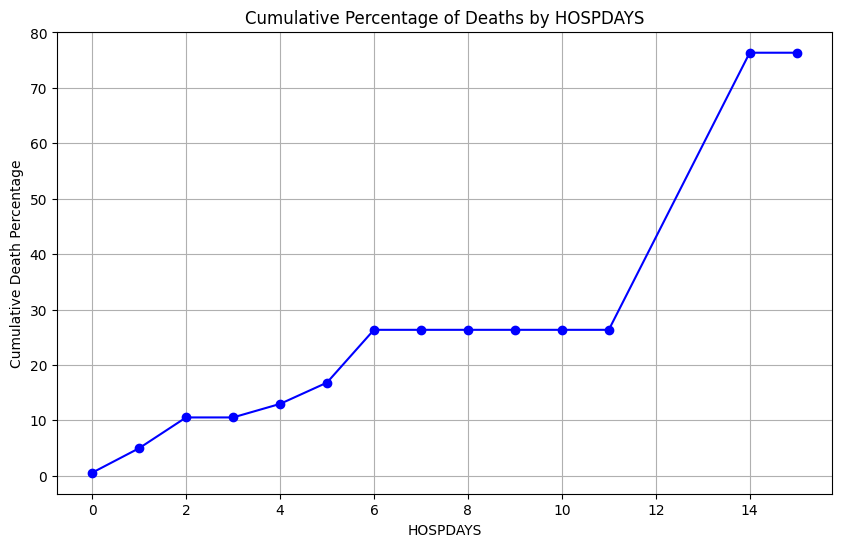

In [89]:
# Group by 'HOSPDAYS' and calculate the percentage of deaths
age_death_percentage_age_yrs = df.groupby('HOSPDAYS')['DIED'].mean() * 100

plt.figure(figsize=(10, 6))
plt.plot(age_death_percentage_age_yrs.index, age_death_percentage_age_yrs.values, marker='o', linestyle='-', color='b')
plt.title('Percentage of Deaths by HOSPDAYS')
plt.xlabel('HOSPDAYS')
plt.ylabel('Cumulative Death Percentage')
plt.grid(True)
plt.show()

cumulative_death_percentage_age_yrs = age_death_percentage_age_yrs.cumsum()

# Plot the cumulative percentage of deaths by age year (AGE_YRS)
plt.figure(figsize=(10, 6))
plt.plot(cumulative_death_percentage_age_yrs.index, cumulative_death_percentage_age_yrs.values, marker='o', linestyle='-', color='b')
plt.title('Cumulative Percentage of Deaths by HOSPDAYS')
plt.xlabel('HOSPDAYS')
plt.ylabel('Cumulative Death Percentage')
plt.grid(True)
plt.show()

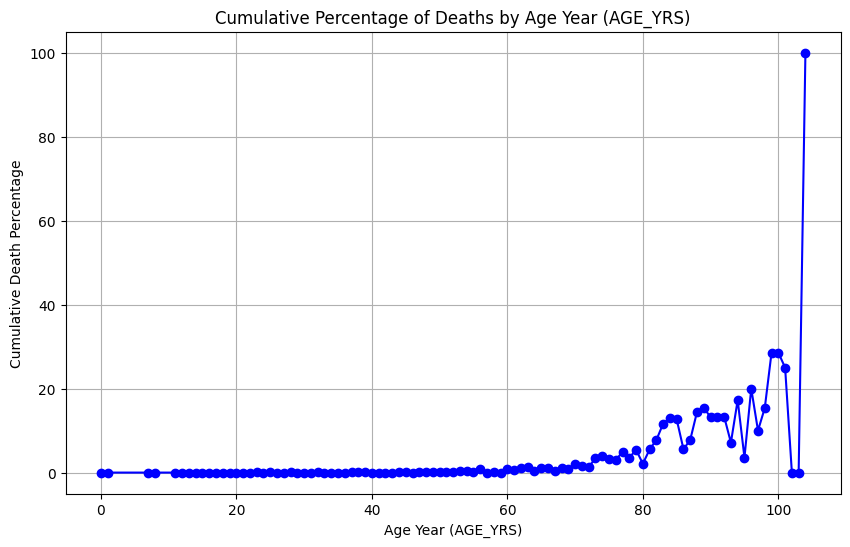

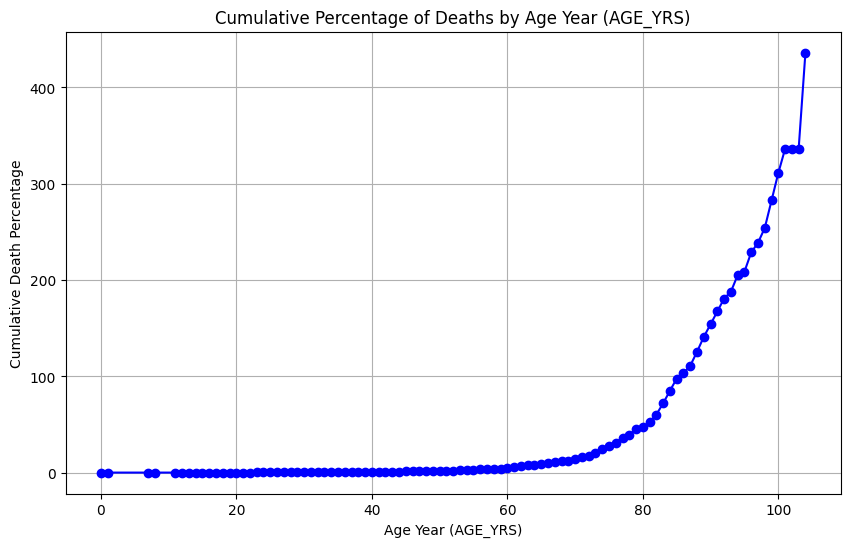

In [90]:
# Group by 'AGE_YRS' and calculate the percentage of deaths
age_death_percentage_age_yrs = df.groupby('CAGE_YR')['DIED'].mean() * 100

plt.figure(figsize=(10, 6))
plt.plot(age_death_percentage_age_yrs.index, age_death_percentage_age_yrs.values, marker='o', linestyle='-', color='b')
plt.title('Percentage of Deaths by Age Year (AGE_YRS)')
plt.xlabel('Age Year (AGE_YRS)')
plt.ylabel('Cumulative Death Percentage')
plt.grid(True)
plt.show()

# Calculate the cumulative percentage of deaths by age year (AGE_YRS)
cumulative_death_percentage_age_yrs = age_death_percentage_age_yrs.cumsum()

# Plot the cumulative percentage of deaths by age year (AGE_YRS)
plt.figure(figsize=(10, 6))
plt.plot(cumulative_death_percentage_age_yrs.index, cumulative_death_percentage_age_yrs.values, marker='o', linestyle='-', color='b')
plt.title('Cumulative Percentage of Deaths by Age Year (AGE_YRS)')
plt.xlabel('Age Year (AGE_YRS)')
plt.ylabel('Cumulative Death Percentage')
plt.grid(True)
plt.show()


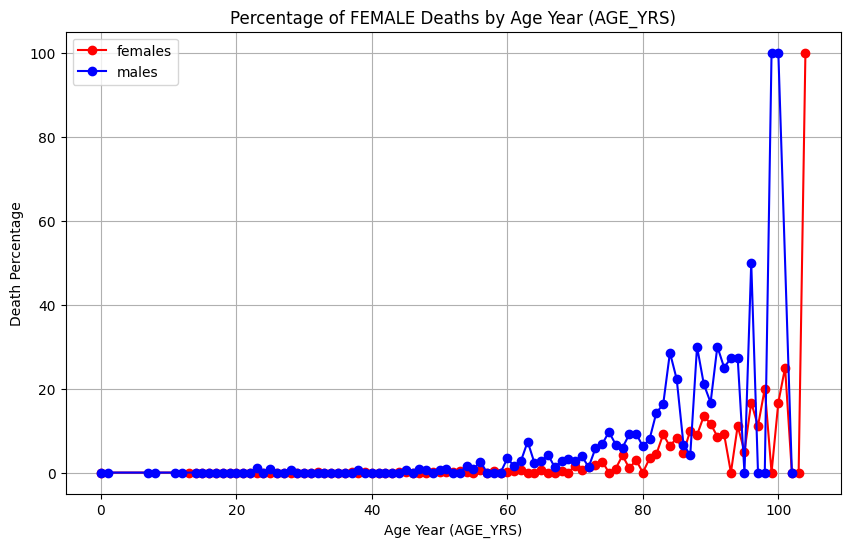

In [94]:
age_death_percentage_age_yrs_f = df[df["SEX"]==1].groupby('CAGE_YR')['DIED'].mean() * 100
age_death_percentage_age_yrs = df[df["SEX"]==0].groupby('CAGE_YR')['DIED'].mean() * 100

plt.figure(figsize=(10, 6))
plt.plot(age_death_percentage_age_yrs_f.index, age_death_percentage_age_yrs_f.values, marker='o', linestyle='-', color='r')
plt.plot(age_death_percentage_age_yrs.index, age_death_percentage_age_yrs.values, marker='o', linestyle='-', color='b')
plt.title('Percentage of FEMALE Deaths by Age Year (AGE_YRS)')
plt.xlabel('Age Year (AGE_YRS)')
plt.ylabel('Death Percentage')
plt.grid(True)
plt.legend(["females", "males"])
plt.show()

STATE       7
CAGE_YR     7
SEX         7
DIED        7
HOSPITAL    7
HOSPDAYS    7
NUMDAYS     7
VAX_TYPE    7
VAX_MANU    7
dtype: int64


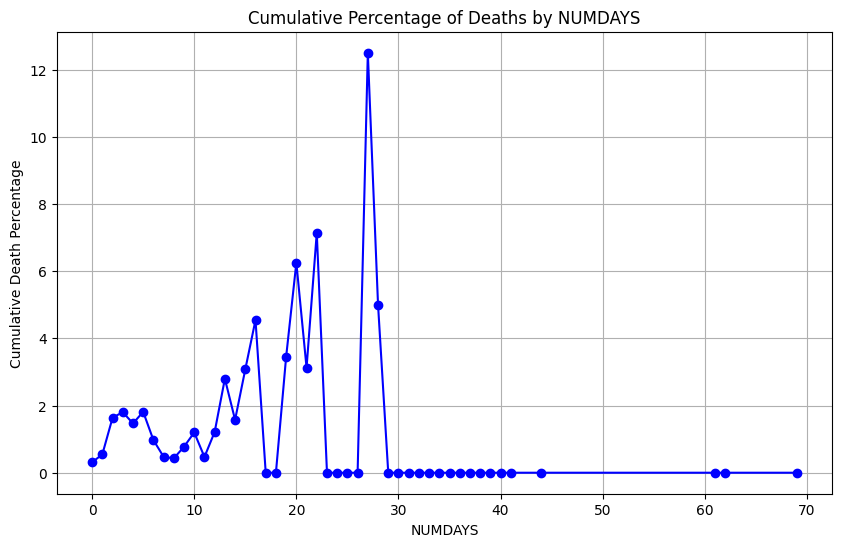

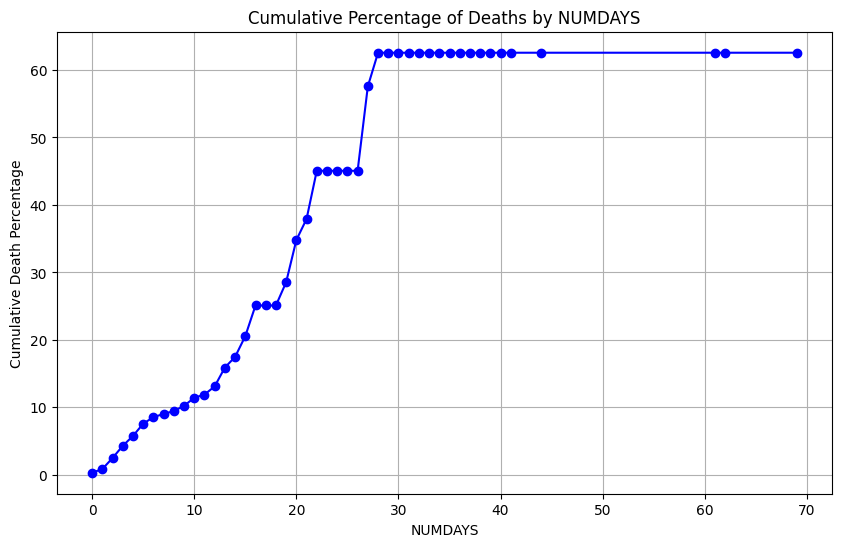

In [92]:
# Group by 'AGE_YRS' and calculate the percentage of deaths
print(df[df["NUMDAYS"]>40].count())

age_death_percentage_age_yrs = df.groupby('NUMDAYS')['DIED'].mean() * 100

plt.figure(figsize=(10, 6))
plt.plot(age_death_percentage_age_yrs.index, age_death_percentage_age_yrs.values, marker='o', linestyle='-', color='b')
plt.title('Cumulative Percentage of Deaths by NUMDAYS')
plt.xlabel('NUMDAYS')
plt.ylabel('Cumulative Death Percentage')
plt.grid(True)
plt.show()

# Calculate the cumulative percentage of deaths by age year (AGE_YRS)
cumulative_death_percentage_age_yrs = age_death_percentage_age_yrs.cumsum()

# Plot the cumulative percentage of deaths by age year (AGE_YRS)
plt.figure(figsize=(10, 6))
plt.plot(cumulative_death_percentage_age_yrs.index, cumulative_death_percentage_age_yrs.values, marker='o', linestyle='-', color='b')
plt.title('Cumulative Percentage of Deaths by NUMDAYS')
plt.xlabel('NUMDAYS')
plt.ylabel('Cumulative Death Percentage')
plt.grid(True)
plt.show()

In [93]:
df["DIED"].value_counts()

DIED
0    41770
1      251
Name: count, dtype: int64